# Granger Causality Comparison Covid and Portfolios

Table of context:
- [China](#chinag)
- [USA](#usag)
- [Japan](#japang)
- [Switzerland](#swissg)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipynb 
import os.path
import statsmodels.api as sm
from importlib import reload 

# other libraries here
import requests
import arrow

In [2]:
import granger_causality_functions
reload(granger_causality_functions)
from granger_causality_functions import scale_data, plot_time_series, plot_correlation_matrix, make_stationary
from granger_causality_functions import grangers_causality_matrix, network_granger, granger_causality

In [38]:
import stock_analysis_functions
reload(stock_analysis_functions)
from stock_analysis_functions import fill_nan

In [3]:
countries_of_interest = ["USA", "CHE", "JPN", "CHN"]

In [4]:
start_date = "2020-01-1"
end_date = "2020-12-01" # yesterday
dfs = {} # dfs of cumulative confirmed cases
for country in countries_of_interest:
    df = pd.read_csv(f"datasets/{country}_covid.csv")
    dfs[country] = df

# China  <a class="anchor" id="chinag"></a>

In [5]:
country = 'China'
country_code = 'CHN'

In [6]:
df = pd.read_csv(f"datasets/{country_code}_covid.csv")
df = df[['date','new_confirmed']]
df['date'] = [x[:10] for x in df['date']] # delete time
df = df.set_index('date')
df.head()

,new_confirmed
date,
2020-01-22,0.0
2020-01-23,95.0
2020-01-24,277.0
2020-01-25,486.0
2020-01-26,669.0


In [7]:
df_port = pd.read_csv(f"datasets/{country}_portfolio.csv")
df_port = df_port.set_index('Date')
df_port.head()

,EW,VW
Date,,
2020-01-07,0.772575,1.222148
2020-01-08,-0.519914,-0.223421
2020-01-09,1.819714,2.281297
2020-01-10,-0.042838,0.113601
2020-01-13,1.157450,0.610604


In [8]:
# merge datasets
df_total = df_port.merge(df , left_index=True, right_index=True)
df_total.head()

,EW,VW,new_confirmed
2020-01-22,0.624012,0.133715,0.0
2020-01-23,-2.428980,-2.354208,95.0
2020-01-24,-1.204449,-1.954879,277.0
2020-01-27,-3.995359,-3.922354,802.0
2020-01-28,1.268705,1.897464,2632.0


In [9]:
# scale data:
df_stocks_scaled = scale_data(df_total, df_total.columns)
df_stocks_scaled = df_stocks_scaled.rename(columns={'new_confirmed': 'New Cases'})
df_stocks_scaled.head()

,EW,VW,New Cases
2020-01-22,0.000041,0.000009,0.000000
2020-01-23,-0.000160,-0.000156,0.006276
2020-01-24,-0.000080,-0.000129,0.018301
2020-01-27,-0.000264,-0.000259,0.052986
2020-01-28,0.000084,0.000125,0.173890


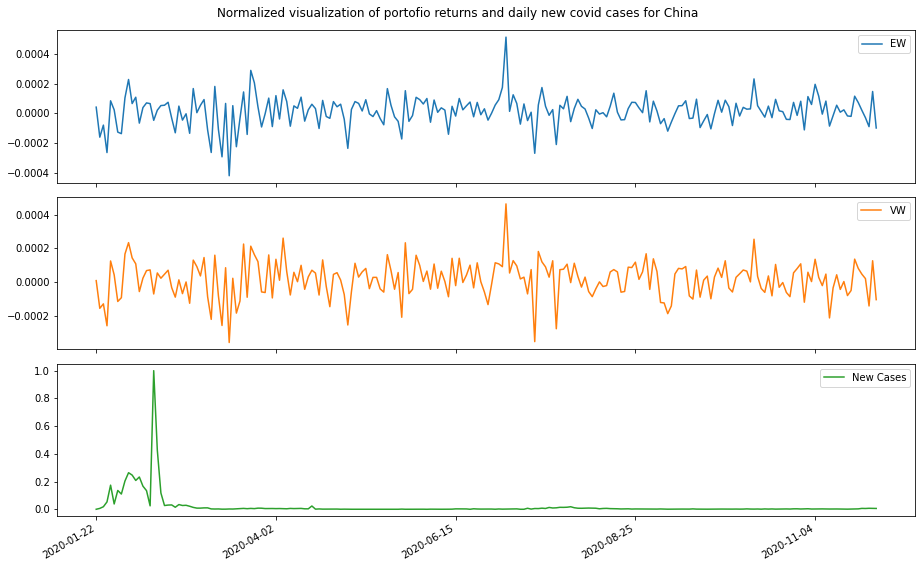

In [10]:
title_plot = 'Normalized visualization of portofio returns and daily new covid cases for ' + country
plot_time_series(df_stocks_scaled, title_plot, country)

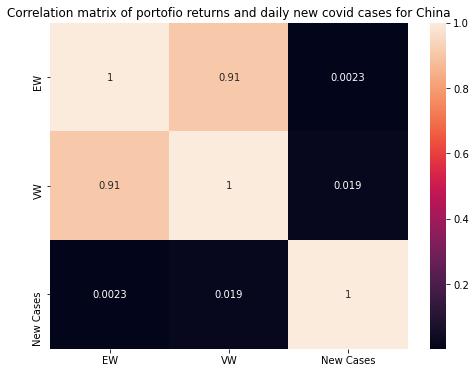

In [11]:
title_plot = 'Correlation matrix of portofio returns and daily new covid cases for ' + country
plot_correlation_matrix(df_stocks_scaled, df_stocks_scaled.columns, title_plot, country)

STATIONARY TEST: 

 Dickey-Fuller Stationary Test for "EW" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -7.8347
 No. Lags Chosen      = 3
 Critical value 1%     = -3.461
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "VW" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -8.1542
 No. Lags Chosen      = 3
 Critical value 1%     = -3.461
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "New Cases" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -2.7999
 No. Lags Chosen      = 6
 C

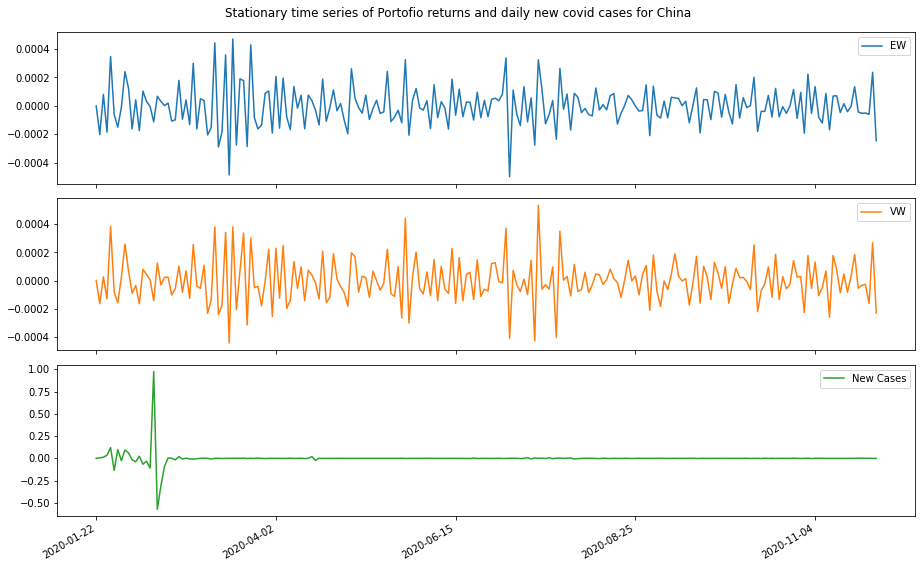


GRANGER CAUSALITY MATRIX: 



,EW_x,VW_x,New Cases_x
EW_y,0.0,0.328,0.355
VW_y,0.332,0.0,0.552
New Cases_y,0.0,0.0,0.0


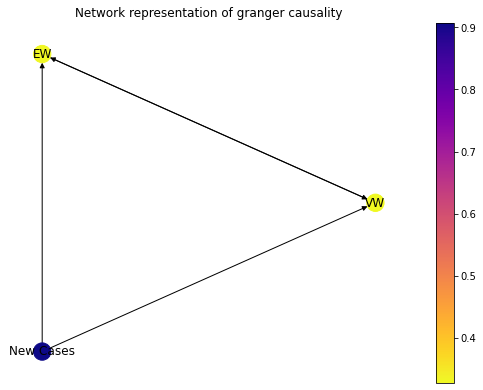

In [12]:
title_plot = 'Portofio returns and daily new covid cases for ' + country
granger_matrix = granger_causality(df_stocks_scaled, df_stocks_scaled.columns, title_plot, country)

With rolling:

# USA  <a class="anchor" id="usag"></a>

In [13]:
country = 'USA'
country_code = 'USA'

In [14]:
df = pd.read_csv(f"datasets/{country_code}_covid.csv")
df = df[['date','new_confirmed']]
df['date'] = [x[:10] for x in df['date']] # delete time
df = df.set_index('date')
df.head()

,new_confirmed
date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,1.0
2020-01-25,0.0
2020-01-26,3.0


In [15]:
df_port = pd.read_csv(f"datasets/{country}_portfolio.csv")
df_port = df_port.set_index('Date')
df_port.head()

,EW,VW
Date,,
2020-01-07,-0.173111,-0.393110
2020-01-08,0.555981,0.584548
2020-01-09,0.517048,0.547397
2020-01-10,-0.306339,-0.431731
2020-01-13,1.024530,0.973168


In [16]:
# merge datasets
df_total = df_port.merge(df , left_index=True, right_index=True)
df_total.head()

,EW,VW,new_confirmed
2020-01-22,0.170175,-0.311989,0.0
2020-01-23,-0.047698,0.821501,0.0
2020-01-24,-0.732681,-0.761180,1.0
2020-01-27,-1.639182,-1.949440,0.0
2020-01-28,1.112150,1.149336,0.0


In [17]:
# scale data:
df_stocks_scaled = scale_data(df_total, df_total.columns)
df_stocks_scaled = df_stocks_scaled.rename(columns={'new_confirmed': 'New Cases'})
df_stocks_scaled.head()

,EW,VW,New Cases
2020-01-22,8.334427e-07,-0.000002,0.000000
2020-01-23,-2.336056e-07,0.000004,0.000000
2020-01-24,-3.588356e-06,-0.000004,0.000005
2020-01-27,-8.028004e-06,-0.000010,0.000000
2020-01-28,5.446829e-06,0.000006,0.000000


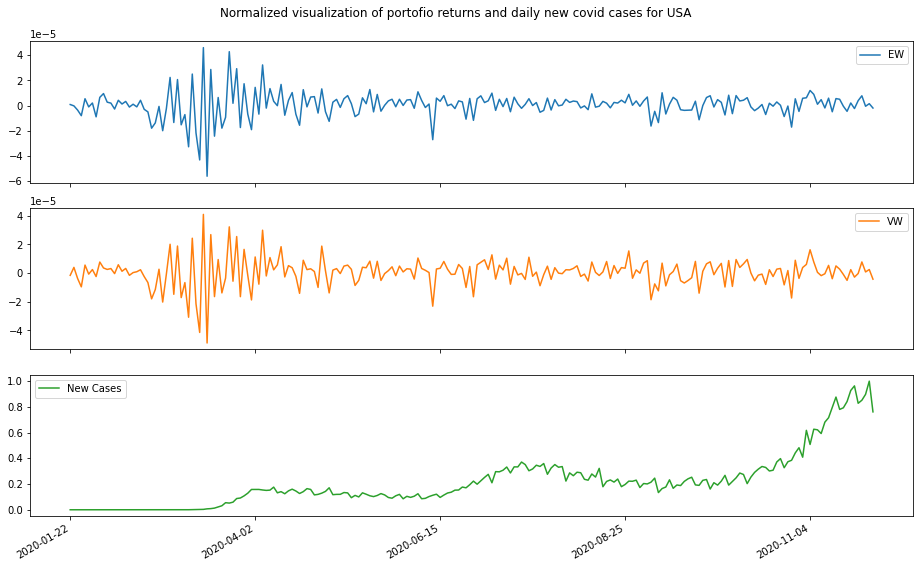

In [18]:
title_plot = 'Normalized visualization of portofio returns and daily new covid cases for ' + country
plot_time_series(df_stocks_scaled, title_plot, country)

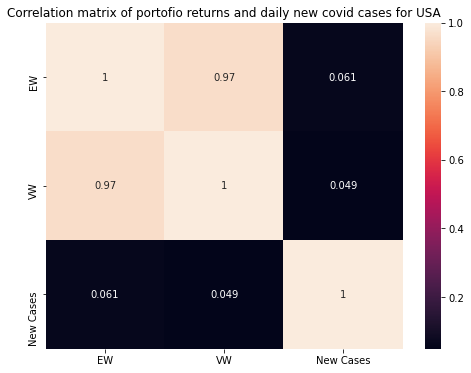

In [19]:
title_plot = 'Correlation matrix of portofio returns and daily new covid cases for ' + country
plot_correlation_matrix(df_stocks_scaled, df_stocks_scaled.columns, title_plot, country)

STATIONARY TEST: 

 Dickey-Fuller Stationary Test for "EW" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -3.9872
 No. Lags Chosen      = 8
 Critical value 1%     = -3.462
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.0015. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "VW" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -4.1614
 No. Lags Chosen      = 8
 Critical value 1%     = -3.462
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.0008. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "New Cases" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -1.6599
 No. Lags Chosen      

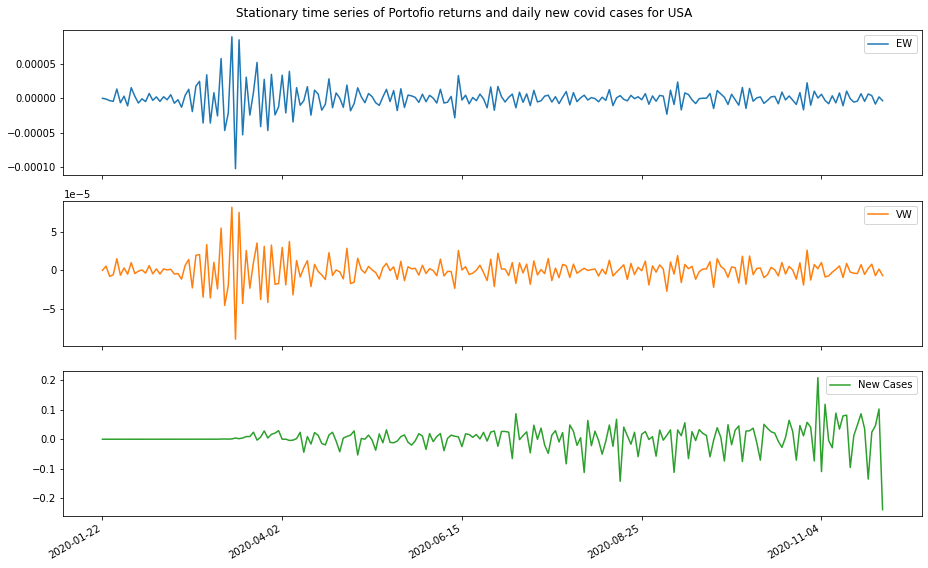


GRANGER CAUSALITY MATRIX: 



,EW_x,VW_x,New Cases_x
EW_y,0.0,0.0,0.713
VW_y,0.0,0.0,0.792
New Cases_y,0.496,0.421,0.0


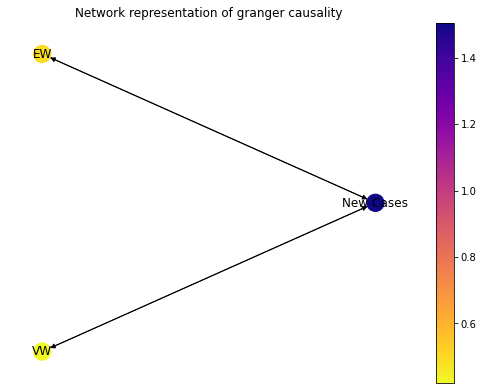

In [20]:
title_plot = 'Portofio returns and daily new covid cases for ' + country
granger_matrix = granger_causality(df_stocks_scaled, df_stocks_scaled.columns, title_plot, country)

# Japan  <a class="anchor" id="japang"></a>

In [21]:
country = 'Japan'
country_code = 'JPN'

In [22]:
df = pd.read_csv(f"datasets/{country_code}_covid.csv")
df = df[['date','new_confirmed']]
df['date'] = [x[:10] for x in df['date']] # delete time
df = df.set_index('date')
df.head()

,new_confirmed
date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,2.0


In [23]:
df_port = pd.read_csv(f"datasets/{country}_portfolio.csv")
df_port = df_port.set_index('Date')
df_port.head()

,EW,VW
Date,,
2020-01-06,0.225091,0.480917
2020-01-07,0.195871,0.534318
2020-01-08,0.130477,-0.166757
2020-01-09,0.287765,0.375814
2020-01-10,-0.316420,-0.421251


In [24]:
# merge datasets
df_total = df_port.merge(df , left_index=True, right_index=True)
df_total.head()

,EW,VW,new_confirmed
2020-01-22,0.076674,-0.271578,0.0
2020-01-23,-0.178793,-0.171632,0.0
2020-01-24,-0.402088,-0.599649,0.0
2020-01-27,-0.699733,-0.638943,0.0
2020-01-28,0.434832,0.628786,3.0


In [25]:
# scale data:
df_stocks_scaled = scale_data(df_total, df_total.columns)
df_stocks_scaled = df_stocks_scaled.rename(columns={'new_confirmed': 'New Cases'})
df_stocks_scaled.head()

,EW,VW,New Cases
2020-01-22,0.000030,-0.000106,0.000000
2020-01-23,-0.000070,-0.000067,0.000000
2020-01-24,-0.000157,-0.000235,0.000000
2020-01-27,-0.000274,-0.000250,0.000000
2020-01-28,0.000170,0.000246,0.001175


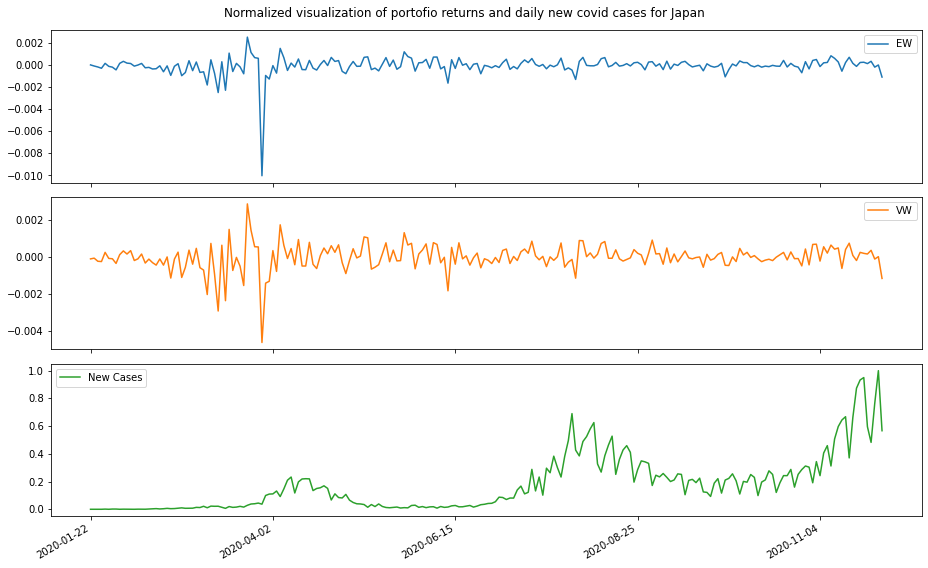

In [26]:
title_plot = 'Normalized visualization of portofio returns and daily new covid cases for ' + country
plot_time_series(df_stocks_scaled, title_plot, country)

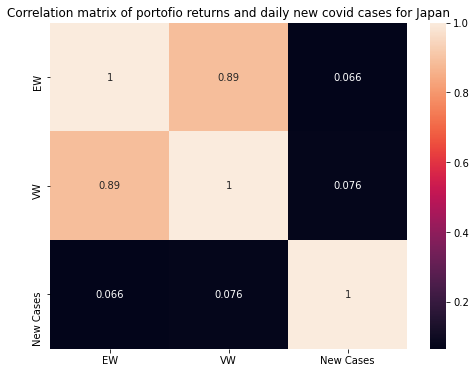

In [27]:
title_plot = 'Correlation matrix of portofio returns and daily new covid cases for ' + country
plot_correlation_matrix(df_stocks_scaled, df_stocks_scaled.columns, title_plot, country)

STATIONARY TEST: 

 Dickey-Fuller Stationary Test for "EW" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -8.4834
 No. Lags Chosen      = 3
 Critical value 1%     = -3.461
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "VW" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -6.5921
 No. Lags Chosen      = 4
 Critical value 1%     = -3.461
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "New Cases" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -2.4385
 No. Lags Chosen      = 7
 C

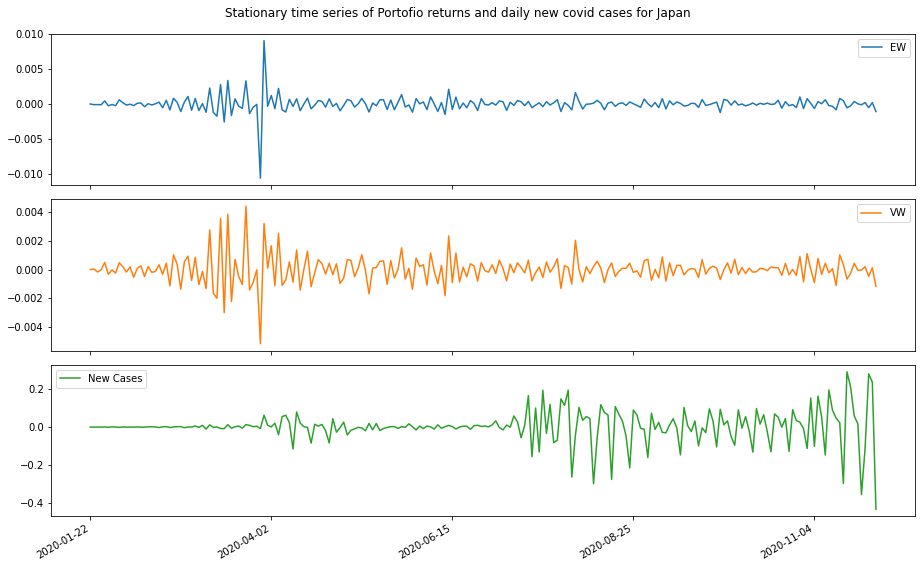


GRANGER CAUSALITY MATRIX: 



,EW_x,VW_x,New Cases_x
EW_y,0.0,0.0,0.336
VW_y,0.0,0.0,0.105
New Cases_y,0.529,0.541,0.0


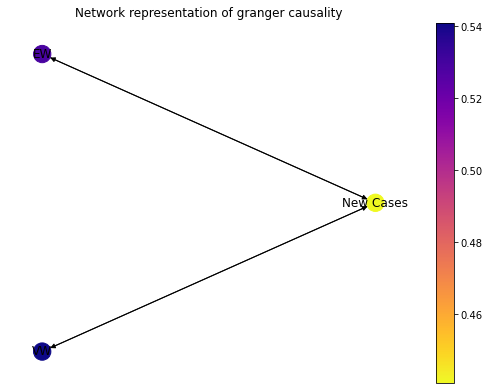

In [28]:
title_plot = 'Portofio returns and daily new covid cases for ' + country
granger_matrix = granger_causality(df_stocks_scaled, df_stocks_scaled.columns, title_plot, country)

# Switzerland  <a class="anchor" id="swissg"></a>

In [29]:
country = 'Switzerland'
country_code = 'CHE'

In [30]:
df = pd.read_csv(f"datasets/{country_code}_covid.csv")
df = df[['date','new_confirmed']]
df['date'] = [x[:10] for x in df['date']] # delete time
df = df.set_index('date')
df.head()

,new_confirmed
date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0


In [31]:
df_port = pd.read_csv(f"datasets/{country}_portfolio.csv")
df_port = df_port.set_index('Date')
df_port.head()

,EW,VW
Date,,
2020-01-06,0.021097,0.045593
2020-01-07,0.666565,0.347584
2020-01-08,-0.060602,0.108184
2020-01-09,-0.129355,0.008797
2020-01-10,-0.201654,-0.224741


In [32]:
# merge datasets
df_total = df_port.merge(df , left_index=True, right_index=True)
df_total.head()

,EW,VW,new_confirmed
2020-01-22,0.052740,0.211150,0.0
2020-01-23,-0.619322,-0.875241,0.0
2020-01-24,0.308926,0.506619,0.0
2020-01-27,-1.820848,-1.465504,0.0
2020-01-28,0.656589,0.956997,0.0


In [43]:
# scale data:
df_stocks_scaled = scale_data(df_total, df_total.columns)
df_stocks_scaled = df_stocks_scaled.fillna(0)
df_stocks_scaled = df_stocks_scaled.rename(columns={'new_confirmed': 'New Cases'})
df_stocks_scaled.head()

,EW,VW,New Cases
2020-01-22,0.000002,0.000010,0.0
2020-01-23,-0.000028,-0.000040,0.0
2020-01-24,0.000014,0.000023,0.0
2020-01-27,-0.000083,-0.000067,0.0
2020-01-28,0.000030,0.000044,0.0


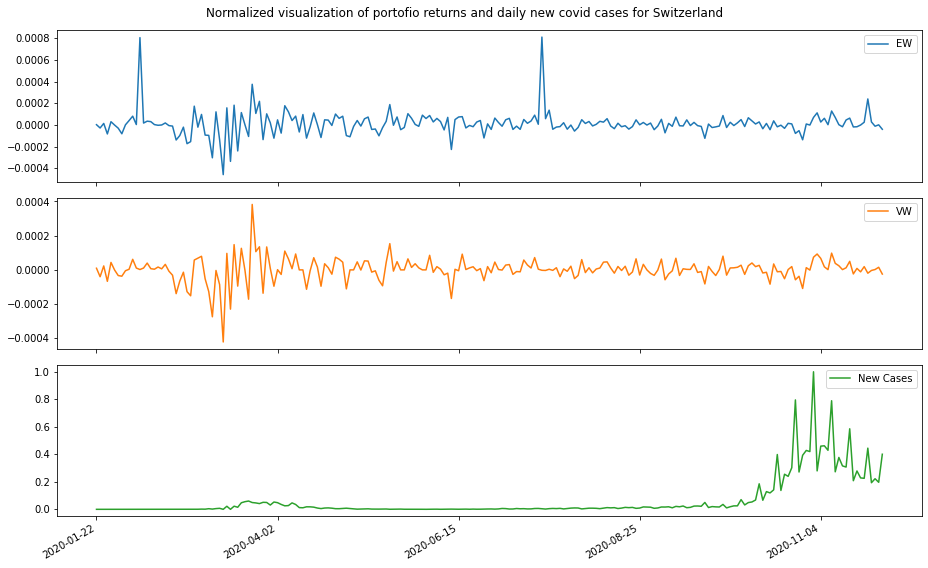

In [44]:
title_plot = 'Normalized visualization of portofio returns and daily new covid cases for ' + country
plot_time_series(df_stocks_scaled, title_plot, country)

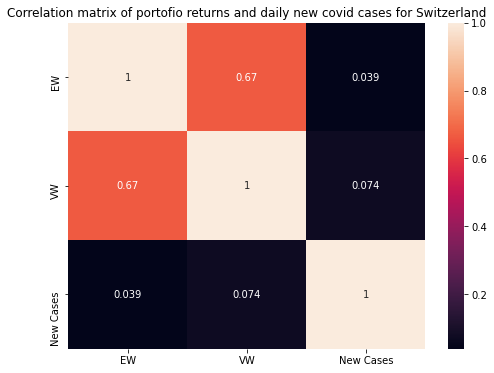

In [45]:
title_plot = 'Correlation matrix of portofio returns and daily new covid cases for ' + country
plot_correlation_matrix(df_stocks_scaled, df_stocks_scaled.columns, title_plot, country)

STATIONARY TEST: 

 Dickey-Fuller Stationary Test for "EW" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -8.5661
 No. Lags Chosen      = 1
 Critical value 1%     = -3.461
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "VW" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = -5.3818
 No. Lags Chosen      = 7
 Critical value 1%     = -3.462
 Critical value 5%     = -2.875
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting H0.
 => Series is Stationary


 Dickey-Fuller Stationary Test for "New Cases" 
 -----------------------------------------------
 Null Hypothesis: Data are Non-Stationary.
 Significance level   = 0.05
 Test Statistics      = 2.0415
 No. Lags Chosen      = 14
 C

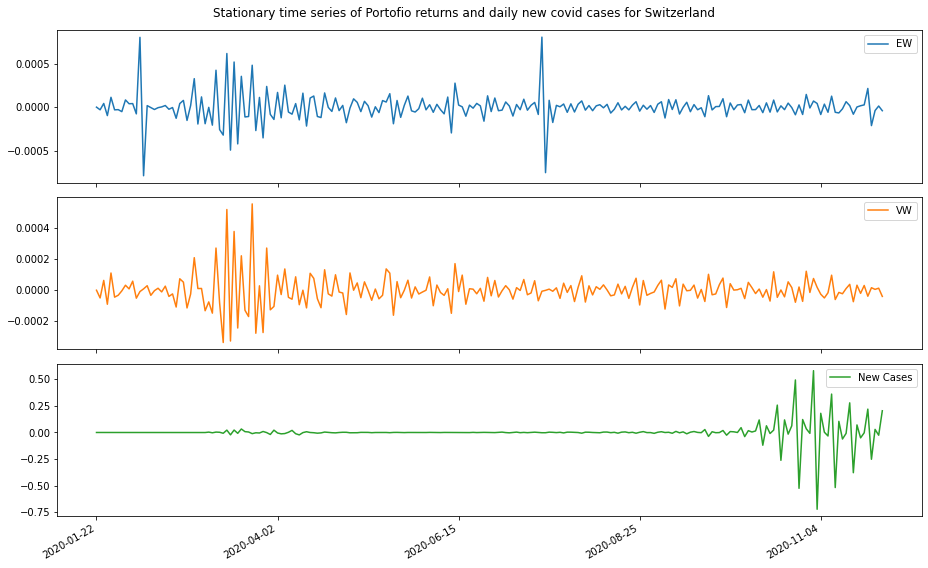


GRANGER CAUSALITY MATRIX: 



,EW_x,VW_x,New Cases_x
EW_y,0.0,0.0,0.393
VW_y,0.235,0.0,0.628
New Cases_y,0.76,0.254,0.0


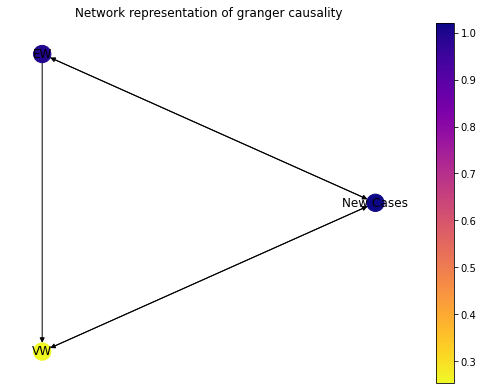

In [46]:
title_plot = 'Portofio returns and daily new covid cases for ' + country
granger_matrix = granger_causality(df_stocks_scaled, df_stocks_scaled.columns, title_plot, country)